In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'MonteCarlo'

link = 'https://rally-base.com/2023/rallye-monte-carlo-2023/?ssId='
startat, no_ss=7317, int(18) # starting number of url, count of Special Stages
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(ss, val, ss_a, "\n", my_url11)
    
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[1]
   
    data.columns = data.iloc[0]
    data = data[1:]
    data['ss']=ss+1
    #print(data.columns)
    
    equal = '-' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('-', method='ffill')
    
    #data.to_csv('05_rally23_SS'+str(ss+1)+'.csv', index=False)

    rally_23.append(data)

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)
#rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(str).astype(int)
rally2023_stages['No.'] = rally2023_stages['No.'].astype(str).astype(int)
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:10]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No.,Crew,Group,SS time,Aver. speed sec/km,Diff.Leader Diff.Prev.,ss,Race,cou
1,1,17,Ogier S.,RC1,00:10:22.9,87.38 0.00,00:00:00.0 00:00:00.0,1,MonteCarlo,1
2,2,33,Evans Elf,RC1,00:10:24.2,87.20 0.09,00:00:01.3 00:00:01.3,1,MonteCarlo,2
3,3,11,Neuville,RC1,00:10:28.9,86.55 0.40,00:00:06.0 00:00:04.7,1,MonteCarlo,3
4,4,18,Katsuta T,RC1,00:10:29.8,86.43 0.46,00:00:06.9 00:00:00.9,1,MonteCarlo,4
5,5,69,Rovanperä,RC1,00:10:30.3,86.36 0.49,00:00:07.4 00:00:00.5,1,MonteCarlo,5
...,...,...,...,...,...,...,...,...,...,...
63,63,81,Palmero J,RC4,00:13:55.7,65.13 15.56,00:03:55.2 00:00:15.7,18,MonteCarlo,63
64,64,86,Dessi Mar,RC5,00:14:17.4,63.48 16.99,00:04:16.9 00:00:21.7,18,MonteCarlo,64
65,65,72,Mallard J,RC4,00:14:53.0,60.95 19.34,00:04:52.5 00:00:35.6,18,MonteCarlo,65
66,66,53,Gino Ales,RC2,00:14:57.3,60.66 19.63,00:04:56.8 00:00:04.3,18,MonteCarlo,66


In [5]:
rally2023_stageClass=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'SS time', 'cou'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'Pos.', 'cou'], axis=1)
rally2023_ClassView = rally2023_stageClass.set_index(['No.', 'Crew','Group','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['No.', 'Crew','Group', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
rally2023_ClassView2 = rally2023_stageClass2.set_index(['No.','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView2 = rally2023_ClassView2.fillna("-")


In [6]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv',index=False)

In [7]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView2, (str(rallyname) + '_Stages_Classification.jpg'))


In [8]:
rally2023_ClassView

0                               Pos.                                          \
ss                                1   2   3   4   5   6   7   8   9   10  11   
No. Crew       Group Race                                                      
4   Lappi  Esa RC1   MonteCarlo    8   8   9   9   5   8   8   6   7   5   6   
6   Sordo  Dan RC1   MonteCarlo    9   6   7   7   6   7   7   8   9   8   8   
7   Loubet  P. RC1   MonteCarlo    7   7   6   8  43  57  61  54   8  71  70   
8   Tänak  Ott RC1   MonteCarlo    6   3   5   5   7   6   6   5   5   7   5   
9   Serderidis RC1   MonteCarlo   40  49  34  30  32  31  33  30  25  32  30   
...                              ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
83  Vialle  Li RC5   MonteCarlo   65  65  66  64  60  63  60  58  65  57  62   
84  Ressegaire RC5   MonteCarlo   60  60  60  57  58  55  55  53  57  55  55   
85  Berard  C. RC5   MonteCarlo   64  64  61  67  63  62  62  62  68  61  66   
86  Dessi  Mar RC5   MonteCarlo   74  74  71  69  67  66  65  65  69  70  66   
87  Charnay  J RC5   MonteCarlo   70  69  68  60  56  61  57  56  60  58  56   

0                                                            
ss                               12  13  14  15  16  17  18  
No. Crew       Group Race                                    
4   Lappi  Esa RC1   MonteCarlo  13   5   6   7   7   5   6  
6   Sordo  Dan RC1   MonteCarlo   7   8  10   5   8   6   7  
7   Loubet  P. RC1   MonteCarlo  69  67  65  39   5   -   -  
8   Tänak  Ott RC1   MonteCarlo   6   7   7   7   9  12   2  
9   Serderidis RC1   MonteCarlo  24  27  24  28  23  23  21  
...                              ..  ..  ..  ..  ..  ..  ..  
83  Vialle  Li RC5   MonteCarlo  62  56  58  66  62  62  59  
84  Ressegaire RC5   MonteCarlo  54  51  41  57  51  56  52  
85  Berard  C. RC5   MonteCarlo  63  62  63  65  64  63  61  
86  Dessi  Mar RC5   MonteCarlo  66  66  69  67  67  66  64  
87  Charnay  J RC5   MonteCarlo  58  55  55  59  59  58  58  

[74 rows x 18 columns]

In [9]:
rally2023_stages[['time_hh', 'time_mm','time_ss']] = rally2023_stages['SS time'].str.split(':', expand=True)
rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_hh']*3600 + rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'SS time', 'Aver. speed sec/km',  'Diff.Leader Diff.Prev.', 'time_hh', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,No.,Crew,Group,ss,Race,cou,time_SS_sec
1,17,Ogier S.,RC1,1,MonteCarlo,1,622.9
2,33,Evans Elf,RC1,1,MonteCarlo,2,624.2
3,11,Neuville,RC1,1,MonteCarlo,3,628.9
4,18,Katsuta T,RC1,1,MonteCarlo,4,629.8
5,69,Rovanperä,RC1,1,MonteCarlo,5,630.3
...,...,...,...,...,...,...,...
63,81,Palmero J,RC4,18,MonteCarlo,63,835.7
64,86,Dessi Mar,RC5,18,MonteCarlo,64,857.4
65,72,Mallard J,RC4,18,MonteCarlo,65,893.0
66,53,Gino Ales,RC2,18,MonteCarlo,66,897.3


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race       ss          
MonteCarlo 1      622.9
           2      970.8
           3      594.7
           4      704.7
           5      510.7
           6      589.3
           7      698.7
           8      504.0
           9      545.5
           10     567.1
           11     695.7
           12     541.8
           13     567.6
           14     690.2
           15     737.9
           16     608.9
           17     737.0
           18     600.5

In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time
0,17,Ogier S.,RC1,1,MonteCarlo,1,622.9,622.9
1,33,Evans Elf,RC1,1,MonteCarlo,2,624.2,622.9
2,11,Neuville,RC1,1,MonteCarlo,3,628.9,622.9
3,18,Katsuta T,RC1,1,MonteCarlo,4,629.8,622.9
4,69,Rovanperä,RC1,1,MonteCarlo,5,630.3,622.9
...,...,...,...,...,...,...,...,...
1285,81,Palmero J,RC4,18,MonteCarlo,63,835.7,600.5
1286,86,Dessi Mar,RC5,18,MonteCarlo,64,857.4,600.5
1287,72,Mallard J,RC4,18,MonteCarlo,65,893.0,600.5
1288,53,Gino Ales,RC2,18,MonteCarlo,66,897.3,600.5


In [12]:
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,17,Ogier S.,RC1,1,MonteCarlo,1,622.9,622.9,0.0,0.000000,01
1,33,Evans Elf,RC1,1,MonteCarlo,2,624.2,622.9,1.3,0.208701,01
2,11,Neuville,RC1,1,MonteCarlo,3,628.9,622.9,6.0,0.963236,01
3,18,Katsuta T,RC1,1,MonteCarlo,4,629.8,622.9,6.9,1.107722,01
4,69,Rovanperä,RC1,1,MonteCarlo,5,630.3,622.9,7.4,1.187992,01
...,...,...,...,...,...,...,...,...,...,...,...
1285,81,Palmero J,RC4,18,MonteCarlo,63,835.7,600.5,235.2,39.167361,18
1286,86,Dessi Mar,RC5,18,MonteCarlo,64,857.4,600.5,256.9,42.781016,18
1287,72,Mallard J,RC4,18,MonteCarlo,65,893.0,600.5,292.5,48.709409,18
1288,53,Gino Ales,RC2,18,MonteCarlo,66,897.3,600.5,296.8,49.425479,18


In [13]:
ss_times_WRC = ss_times_F[ss_times_F['Group'].str.contains('RC1')]
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,17,Ogier S.,RC1,1,MonteCarlo,1,622.9,622.9,0.0,0.000000,01
1,33,Evans Elf,RC1,1,MonteCarlo,2,624.2,622.9,1.3,0.208701,01
2,11,Neuville,RC1,1,MonteCarlo,3,628.9,622.9,6.0,0.963236,01
3,18,Katsuta T,RC1,1,MonteCarlo,4,629.8,622.9,6.9,1.107722,01
4,69,Rovanperä,RC1,1,MonteCarlo,5,630.3,622.9,7.4,1.187992,01
...,...,...,...,...,...,...,...,...,...,...,...
1227,17,Ogier S.,RC1,18,MonteCarlo,5,605.2,600.5,4.7,0.782681,18
1228,4,Lappi Esa,RC1,18,MonteCarlo,6,611.2,600.5,10.7,1.781848,18
1229,6,Sordo Dan,RC1,18,MonteCarlo,7,614.1,600.5,13.6,2.264779,18
1243,9,Serderidis,RC1,18,MonteCarlo,21,656.1,600.5,55.6,9.258951,18


In [14]:
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,17,Ogier S.,RC1,1,MonteCarlo,1,622.9,622.9,0.0,0.000000,01
1,33,Evans Elf,RC1,1,MonteCarlo,2,624.2,622.9,1.3,0.208701,01
2,11,Neuville,RC1,1,MonteCarlo,3,628.9,622.9,6.0,0.963236,01
3,18,Katsuta T,RC1,1,MonteCarlo,4,629.8,622.9,6.9,1.107722,01
4,69,Rovanperä,RC1,1,MonteCarlo,5,630.3,622.9,7.4,1.187992,01
...,...,...,...,...,...,...,...,...,...,...,...
1227,17,Ogier S.,RC1,18,MonteCarlo,5,605.2,600.5,4.7,0.782681,18
1228,4,Lappi Esa,RC1,18,MonteCarlo,6,611.2,600.5,10.7,1.781848,18
1229,6,Sordo Dan,RC1,18,MonteCarlo,7,614.1,600.5,13.6,2.264779,18
1243,9,Serderidis,RC1,18,MonteCarlo,21,656.1,600.5,55.6,9.258951,18


In [15]:
ss_times_F3 =ss_times_WRC.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race       MonteCarlo                                                      \
SS.                01     02    03    04    05     06     07     08    09   
Crew                                                                        
Evans  Elf        1.3    4.7   3.2   2.1  43.4    0.0    1.6    9.6   0.6   
Katsuta  T        6.9   50.1  14.4   6.0   6.4    3.8    4.2    4.9   9.8   
Lappi  Esa       11.6   29.8  18.1  16.1   7.7   15.2   16.3    6.5  14.2   
Loubet  P.       10.9   29.4   8.2  11.1  91.9  155.9  224.3  165.7  19.7   
Neuville          6.0    9.5   7.8   4.9   4.5    4.2    3.3    1.3   2.7   
Ogier  S.         0.0    0.0   0.0   0.0   0.0    0.5    0.0    3.1   2.5   
Rovanperä         7.4    9.7   6.1  10.0   1.3    2.0    3.1    0.0   0.0   
Serderidis       97.9  214.3  80.8  85.9  77.1   82.8   98.9   86.5  70.0   
Sordo  Dan       12.4   19.7  12.8  10.4   8.8    8.5   10.9   10.3  20.0   
Tänak  Ott        8.6    6.8   8.0   7.8   9.0    4.4    7.5    5.7   5.8   

Race                                                                    
SS.            10     11     12     13     14     15    16    17    18  
Crew                                                                    
Evans  Elf    0.4    4.6    1.1    3.0    8.7    2.7  10.5   8.2   0.7  
Katsuta  T    9.4   14.3    5.8    7.8   19.7   16.2   5.6   3.1  58.2  
Lappi  Esa    7.3   12.3   35.4    6.6   22.1   17.3  10.6   7.5  10.7  
Loubet  P.  600.0  600.0  600.0  600.0  600.0  118.5   6.8   NaN   NaN  
Neuville      3.6    5.3    0.0    0.0    6.7    5.1   2.5   7.0   4.2  
Ogier  S.     0.0    4.6    3.4    3.9    9.8    0.0   1.5   0.0   4.7  
Rovanperä     1.1    0.0    2.9    0.2    0.0    2.7   0.0   6.3   0.0  
Serderidis   97.3  124.0   67.9   83.8  131.9   83.0  47.9  58.6  55.6  
Sordo  Dan   15.6   21.2   13.2   12.9   39.9   12.6  10.7   8.0  13.6  
Tänak  Ott    9.6    9.7    6.2    9.7   26.3   17.3  11.8  34.1   0.6

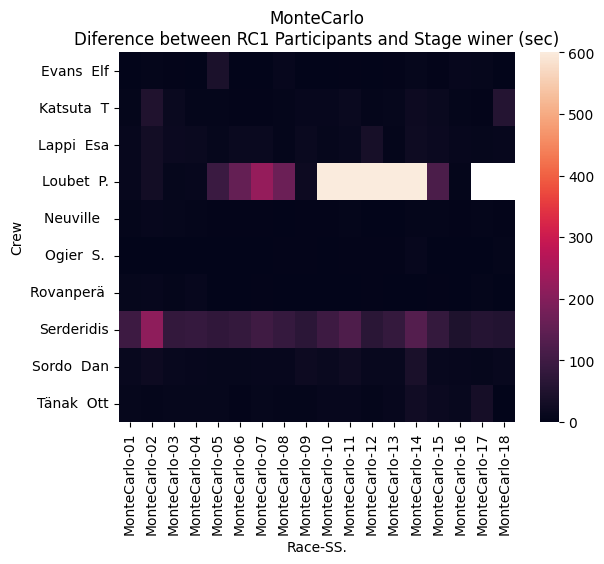

In [16]:
Heatmap_ALL = sns.heatmap(ss_times_F4)
plt.title(rallyname+'\nDiference between RC1 Participants and Stage winer (sec)')
plt.savefig("Heatmap_ALL.png")

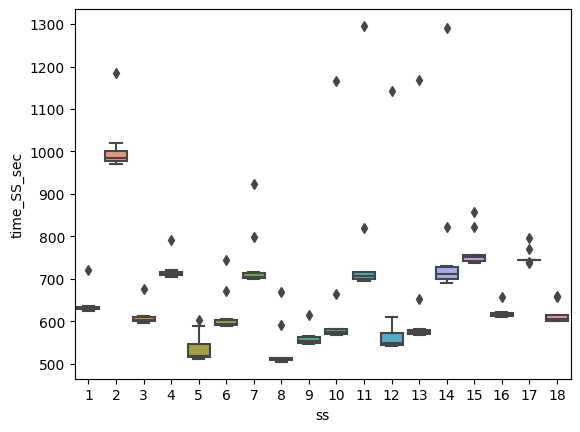

In [17]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])

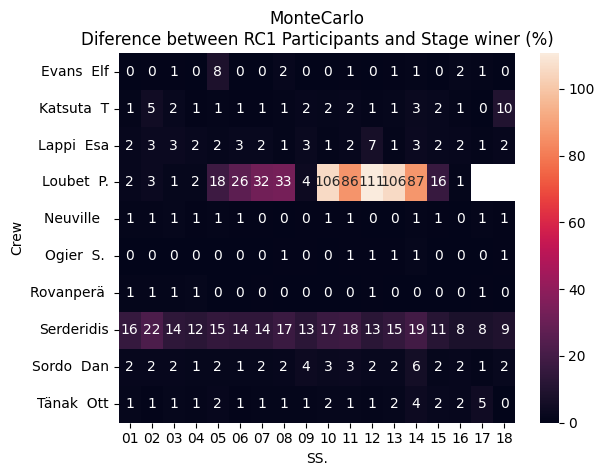

In [18]:
ss_timesa = pd.pivot_table(ss_times_WRC, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between RC1 Participants and Stage winer (%)')
plt.savefig("Rc1.jpg")

In [19]:
ss_times_WRC2 = ss_times_WRC[ss_times_WRC['Crew']!= 'Serderidis']
ss_times_WRC2

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,17,Ogier S.,RC1,1,MonteCarlo,1,622.9,622.9,0.0,0.000000,01
1,33,Evans Elf,RC1,1,MonteCarlo,2,624.2,622.9,1.3,0.208701,01
2,11,Neuville,RC1,1,MonteCarlo,3,628.9,622.9,6.0,0.963236,01
3,18,Katsuta T,RC1,1,MonteCarlo,4,629.8,622.9,6.9,1.107722,01
4,69,Rovanperä,RC1,1,MonteCarlo,5,630.3,622.9,7.4,1.187992,01
...,...,...,...,...,...,...,...,...,...,...,...
1226,11,Neuville,RC1,18,MonteCarlo,4,604.7,600.5,4.2,0.699417,18
1227,17,Ogier S.,RC1,18,MonteCarlo,5,605.2,600.5,4.7,0.782681,18
1228,4,Lappi Esa,RC1,18,MonteCarlo,6,611.2,600.5,10.7,1.781848,18
1229,6,Sordo Dan,RC1,18,MonteCarlo,7,614.1,600.5,13.6,2.264779,18


In [20]:
ss_times_F6 =ss_times_WRC2.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F7 = pd.pivot_table(ss_times_F6, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F7

Race       MonteCarlo                                                     \
SS.                01    02    03    04    05     06     07     08    09   
Crew                                                                       
Evans  Elf        1.3   4.7   3.2   2.1  43.4    0.0    1.6    9.6   0.6   
Katsuta  T        6.9  50.1  14.4   6.0   6.4    3.8    4.2    4.9   9.8   
Lappi  Esa       11.6  29.8  18.1  16.1   7.7   15.2   16.3    6.5  14.2   
Loubet  P.       10.9  29.4   8.2  11.1  91.9  155.9  224.3  165.7  19.7   
Neuville          6.0   9.5   7.8   4.9   4.5    4.2    3.3    1.3   2.7   
Ogier  S.         0.0   0.0   0.0   0.0   0.0    0.5    0.0    3.1   2.5   
Rovanperä         7.4   9.7   6.1  10.0   1.3    2.0    3.1    0.0   0.0   
Sordo  Dan       12.4  19.7  12.8  10.4   8.8    8.5   10.9   10.3  20.0   
Tänak  Ott        8.6   6.8   8.0   7.8   9.0    4.4    7.5    5.7   5.8   

Race                                                                    
SS.            10     11     12     13     14     15    16    17    18  
Crew                                                                    
Evans  Elf    0.4    4.6    1.1    3.0    8.7    2.7  10.5   8.2   0.7  
Katsuta  T    9.4   14.3    5.8    7.8   19.7   16.2   5.6   3.1  58.2  
Lappi  Esa    7.3   12.3   35.4    6.6   22.1   17.3  10.6   7.5  10.7  
Loubet  P.  600.0  600.0  600.0  600.0  600.0  118.5   6.8   NaN   NaN  
Neuville      3.6    5.3    0.0    0.0    6.7    5.1   2.5   7.0   4.2  
Ogier  S.     0.0    4.6    3.4    3.9    9.8    0.0   1.5   0.0   4.7  
Rovanperä     1.1    0.0    2.9    0.2    0.0    2.7   0.0   6.3   0.0  
Sordo  Dan   15.6   21.2   13.2   12.9   39.9   12.6  10.7   8.0  13.6  
Tänak  Ott    9.6    9.7    6.2    9.7   26.3   17.3  11.8  34.1   0.6

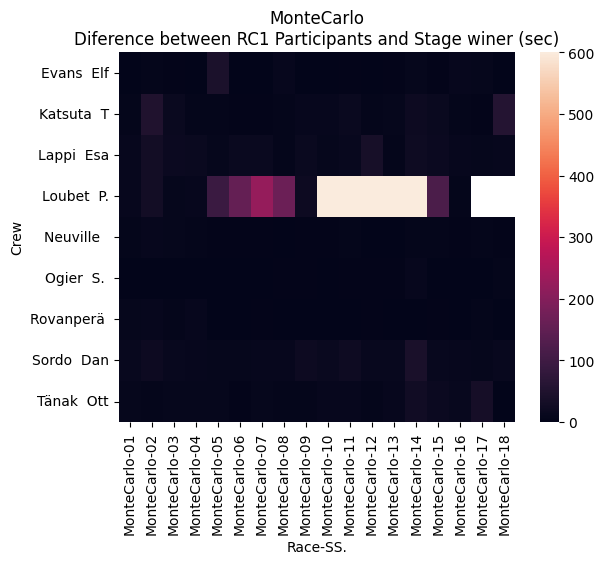

In [21]:
Heatmap_WRC2 = sns.heatmap(ss_times_F7)
plt.title(rallyname+'\nDiference between RC1 Participants and Stage winer (sec)')
plt.savefig("Heatmap_No_Serderidis.png")

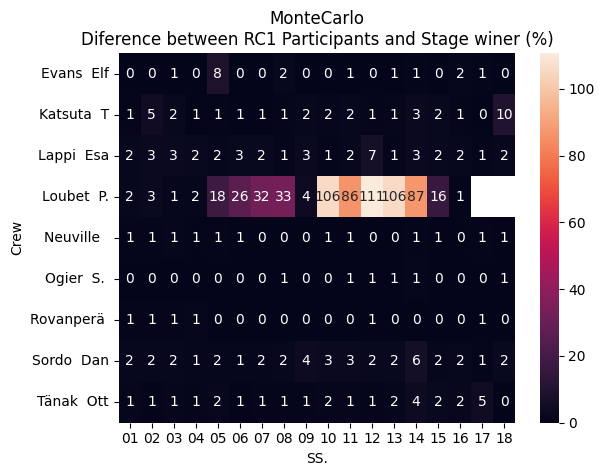

In [22]:
ss_timesb = pd.pivot_table(ss_times_WRC2, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesb, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between RC1 Participants and Stage winer (%)')
plt.savefig("Rc1_No_Serderidis.jpg")